# Exploratory Data Analysis for Character Deviation Data

In this notebook, I will conduct EDA for character deviation data. That is, I will investigate whether the distribution of alphabetic, numerical, and punctuation characters varies across the OCR and ground truth documents. If it does, features related to these deviations may be appropriate explanatory variables for the character error rate prediction model.

Imports

In [8]:
import os
import pandas as pd
import editdistance
import re
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pymysql


File Preparation

In [9]:
df = pd.read_csv("C:/Users/larak/OneDrive/Documents/History-Lab/ddo/OCR paper/readable_v4.csv")

In [10]:
df.head()

,file,lex_ocr,fk_ocr,flesch_ocr,lex_gold,fk_gold,flesch_gold,CER,percent_misspelled,count_thes,...,count_cia,count_uk,count_ic,count_fr,count_nle,count_ef,count_drv,count_va,count_buddhist,count_su
0,GALE_CK2349346194.txt,0.561769,4.628641,82.944254,0.446995,14.917718,36.174668,0.486949,25.955414,1,...,0,0,0,0,0,1,0,0,0,1
1,GALE_CK2349347998.txt,0.482604,8.833292,64.280919,0.357855,15.745466,33.331225,0.212453,16.981132,1,...,0,0,0,0,0,0,0,0,0,0
2,GALE_CK2349354090.txt,0.395423,12.930099,38.573800,0.341304,14.649109,29.873484,0.062577,5.730028,1,...,0,0,0,0,0,0,0,0,0,0
3,GALE_CK2349354764.txt,0.497585,5.614244,82.566375,0.247114,8.993146,57.297364,0.362739,35.954344,1,...,0,0,0,1,0,0,0,0,0,1
4,GALE_CK2349355800.txt,0.708661,4.309904,76.668466,0.578313,13.401156,33.573502,0.230804,27.987421,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ddo_path = 'C:/Users/larak/OneDrive/Documents/History-Lab/ddo/OCR paper/ddo'
readable_csv_path = 'C:/Users/larak/OneDrive/Documents/History-Lab/ddo/OCR paper/readable_v4.csv'
save_path = 'C:/Users/larak/OneDrive/Documents/History-Lab/ddo/OCR paper/readable_v5.csv'

First, let's add features for the percent_alphabetic, percent_numeric, and percent_punctuation.

In [12]:
# Function to preprocess OCR text body
def preprocess_ocr(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    ocr_text = "".join(lines[2:])
    return ocr_text

In [14]:
def calculate_percent_alphanumeric(text):
    num_characters = len(text)
    num_alphabetic = sum(c.isalpha() for c in text)
    num_numeric = sum(c.isdigit() for c in text)
    num_punctuation = sum(c in "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~" for c in text)
    percent_alphabetic = (num_alphabetic / num_characters) * 100 if num_characters else 0
    percent_numeric = (num_numeric / num_characters) * 100 if num_characters else 0
    percent_punctuation = (num_punctuation / num_characters) * 100 if num_characters else 0
    return (percent_alphabetic, percent_numeric, percent_punctuation)


In [15]:
def add_feature_to_csv(readable_csv_path, ddo_path):
    df = pd.read_csv(readable_csv_path)
    percent_alphabetic_list = []
    percent_numeric_list = []
    percent_punctuation_list = []
    
    for filename in df['file']:
        file_path = os.path.join(ddo_path, filename)
        if os.path.exists(file_path):
            ocr_text = preprocess_ocr(file_path)
            (percent_alphabetic, percent_numeric, percent_punctuation) = calculate_percent_alphanumeric(ocr_text)
        else:
            print(f"File {filename} not found in {ddo_path}.")
            percent_alphabetic, percent_numeric, percent_punctuation = 0, 0, 0
        percent_alphabetic_list.append(percent_alphabetic)
        percent_numeric_list.append(percent_numeric)
        percent_punctuation_list.append(percent_punctuation)
    
    df["percent_alphabetic"] = percent_alphabetic_list
    df["percent_numeric"] = percent_numeric_list
    df["percent_punctuation"] = percent_punctuation_list
    return df


In [16]:
def main():
    updated_df = add_feature_to_csv(readable_csv_path, ddo_path)
    updated_df.to_csv(save_path, index=False)
    print("Updated CSV saved to:", save_path)

if __name__ == "__main__":
    main()

Updated CSV saved to: C:/Users/larak/OneDrive/Documents/History-Lab/ddo/OCR paper/readable_v5.csv


In [17]:
df = pd.read_csv("C:/Users/larak/OneDrive/Documents/History-Lab/ddo/OCR paper/readable_v5.csv")
df.head()

,file,lex_ocr,fk_ocr,flesch_ocr,lex_gold,fk_gold,flesch_gold,CER,percent_misspelled,count_thes,...,count_fr,count_nle,count_ef,count_drv,count_va,count_buddhist,count_su,percent_alphabetic,percent_numeric,percent_punctuation
0,GALE_CK2349346194.txt,0.561769,4.628641,82.944254,0.446995,14.917718,36.174668,0.486949,25.955414,1,...,0,0,1,0,0,0,1,66.065496,3.607024,9.871856
1,GALE_CK2349347998.txt,0.482604,8.833292,64.280919,0.357855,15.745466,33.331225,0.212453,16.981132,1,...,0,0,0,0,0,0,0,73.832162,1.012815,7.895825
2,GALE_CK2349354090.txt,0.395423,12.930099,38.573800,0.341304,14.649109,29.873484,0.062577,5.730028,1,...,0,0,0,0,0,0,0,79.619317,0.698196,3.640595
3,GALE_CK2349354764.txt,0.497585,5.614244,82.566375,0.247114,8.993146,57.297364,0.362739,35.954344,1,...,1,0,0,0,0,0,1,65.915521,6.568310,6.901778
4,GALE_CK2349355800.txt,0.708661,4.309904,76.668466,0.578313,13.401156,33.573502,0.230804,27.987421,1,...,0,0,0,0,0,0,0,71.580289,1.869159,8.708581


Now, let's plot these features against CER.

In [18]:
X = df['percent_punctuation']
X_const = sm.add_constant(X)  # add constant term
Y = df['CER']

model_punctuation = sm.OLS(Y, X_const).fit()

print("Regression Summary for Percent Punctuation vs. CER:")
print(model_punctuation.summary())

Regression Summary for Percent Punctuation vs. CER:
                            OLS Regression Results                            
Dep. Variable:                    CER   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     162.6
Date:                Sun, 19 May 2024   Prob (F-statistic):           3.95e-27
Time:                        14:48:05   Log-Likelihood:                 81.069
No. Observations:                 187   AIC:                            -158.1
Df Residuals:                     185   BIC:                            -151.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

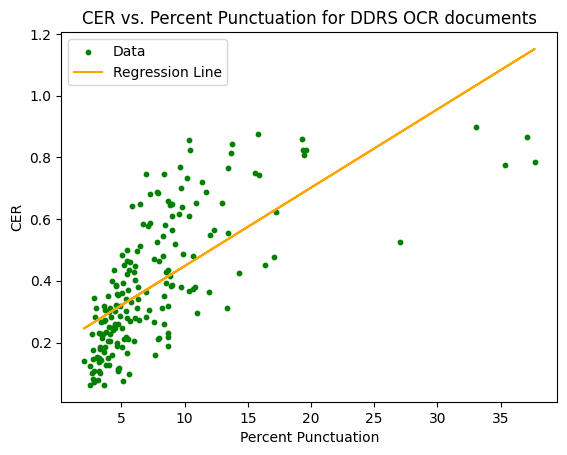

In [32]:
plt.scatter(X, Y, color='green', label='Data', s=10)
plt.plot(X, model_punctuation.predict(X_const), color='orange', label='Regression Line')
plt.xlabel('Percent Punctuation')
plt.ylabel('CER')
plt.title('CER vs. Percent Punctuation for DDRS OCR documents')
plt.legend();

In [38]:
X = df['percent_numeric']
X_const = sm.add_constant(X)  # add constant term
Y = df['CER']

model_numeric = sm.OLS(Y, X_const).fit()

print("Regression Summary for Percent Numeric vs. CER:")
print(model_numeric.summary())

Regression Summary for Percent Numeric vs. CER:
                            OLS Regression Results                            
Dep. Variable:                    CER   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     114.2
Date:                Sun, 19 May 2024   Prob (F-statistic):           4.55e-21
Time:                        14:55:03   Log-Likelihood:                 67.061
No. Observations:                 187   AIC:                            -130.1
Df Residuals:                     185   BIC:                            -123.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

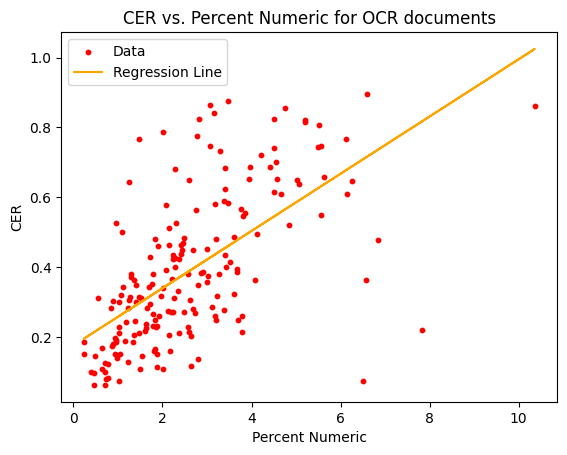

In [39]:
plt.scatter(X, Y, color='red', label='Data',  s=10)
plt.plot(X, model_numeric.predict(X_const), color='orange', label='Regression Line')
plt.xlabel('Percent Numeric')
plt.ylabel('CER')
plt.title('CER vs. Percent Numeric for OCR documents')
plt.legend();

In [40]:
X = df['percent_alphabetic']
X_const = sm.add_constant(X)  # add constant term
Y = df['CER']

# Bivariate regression for Flesch-Kincaid score vs CER
model_alpha = sm.OLS(Y, X_const).fit()

print("Regression Summary for Percent Alphabetic vs. CER:")
print(model_alpha.summary())

Regression Summary for Percent Alphabetic vs. CER:
                            OLS Regression Results                            
Dep. Variable:                    CER   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     316.4
Date:                Sun, 19 May 2024   Prob (F-statistic):           6.44e-42
Time:                        14:55:31   Log-Likelihood:                 115.34
No. Observations:                 187   AIC:                            -226.7
Df Residuals:                     185   BIC:                            -220.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

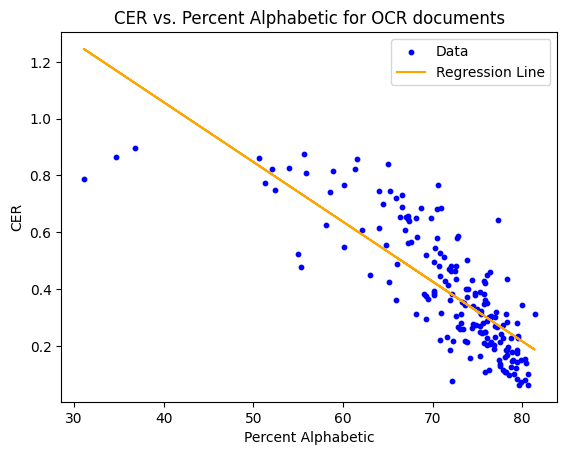

In [41]:
plt.scatter(X, Y, color='blue', label='Data', s=10)
plt.plot(X, model_alpha.predict(X_const), color='orange', label='Regression Line')
plt.xlabel('Percent Alphabetic')
plt.ylabel('CER')
plt.title('CER vs. Percent Alphabetic for OCR documents')
plt.legend();

As would be expected, there is a strong positive trend between percent numeric and CER, as well as percent punctuation and CER. Additionally, there is a negative trend linking percent alphabetic to CER. 

Let's create a correlation heatmap.

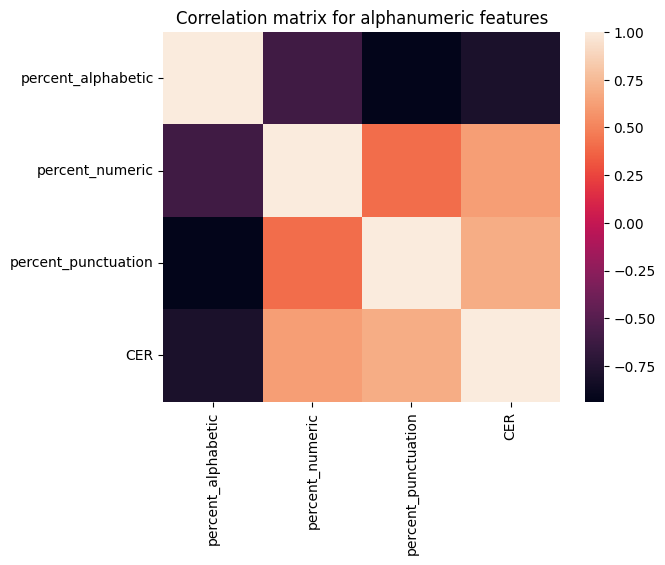

In [45]:
import seaborn as sns
character_features = df[['percent_alphabetic', 'percent_numeric', 'percent_punctuation', 'CER']]
sns.heatmap(character_features.corr())
plt.title("Correlation matrix for alphanumeric features");